In [1]:
!pip install plotly

In [2]:
import os
import plotly.express as px
import webbrowser
import pandas as pd
import shutil

In [3]:
# See your path on MAC OS !!! >>
os.getcwd()

# Write or choose path to your files here !!! >>
path_sourse = "C:/Users/mixas/plots"

In [30]:
path_to_write = path_sourse

os.chdir(path_to_write)

# data saved by "BSoup_all_2.py" >>>
fileName = "df_al_21.xlsx"
fileName = "df_alst_24.xlsx"

In [31]:
## example of scatterplot >>>
#
df = px.data.iris()
fig = px.scatter(df, x="sepal_width",
                 y="sepal_length", color="species")

# save figure on disk >>
fig.write_html("tmp.html")

In [32]:
# open file in webbrowser >>
# use mouse to manipulate with figure !!!
webbrowser.open("tmp.html")

True

In [33]:
## example of pie chart >>>
#
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
# Represent only large countries >>
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries'
fig = px.pie(df, values='pop', names='country',
             title='Population of European continent')

# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
webbrowser.open("tmp.html")

True

In [34]:
## Copy data saved by "BSoup_all_2.py",
##  b/c some paths on the HSE server are prohibited
##  for students to write files !!! >>
#
# If source and destination are the same file,
#  a SameFileError will be raised >>
try:
  shutil.copy(path_sourse+fileName, path_to_write)
except:
  print("\n>>> Source and destination are the same file:\n   ",
        path_sourse+fileName)

# read data creating DataFrame >>
df = pd.read_excel(fileName)
print('\n', df)


>>> Source and destination are the same file:
    C:/Users/mixas/plotsdf_alst_24.xlsx

                          name       assets         liab   st
0    АКБ «Абсолют Банк» (ПАО)  255506019.0  224179079.0  NaN
1          ПАО АКБ «АВАНГАРД»  122210880.0   95018360.0  NaN
2             АО Банк «Аверс»  113140018.0   88370970.0  NaN
3       АО «Авто Финанс Банк»  111179659.0   89520393.0  NaN
4           АО «Автоградбанк»    6076008.0    5199878.0  NaN
..                        ...          ...          ...  ...
675         ООО КБ «ЭРГОБАНК»          NaN          NaN  ОТЗ
676            ООО «ЭСИДБАНК»          NaN          NaN  ОТЗ
677           ПАО БАНК «ЮГРА»          NaN          NaN  ОТЗ
678          ОАО «ЮНИКОРБАНК»          NaN          NaN  ОТЗ
679          ООО РНКО «ЮСиЭс»          NaN          NaN  АНН

[680 rows x 4 columns]


In [35]:
print('\n', df.assets.value_counts(normalize=True))


 2.555060e+08    0.002725
1.364184e+09    0.002725
1.323686e+06    0.002725
1.372870e+06    0.002725
1.753000e+07    0.002725
                  ...   
5.820036e+06    0.002725
2.237947e+07    0.002725
3.913651e+07    0.002725
1.229090e+07    0.002725
2.519725e+06    0.002725
Name: assets, Length: 367, dtype: float64


In [36]:
df.assets.describe().T
df.assets.describe()['25%']
df.assets.quantile(.25)
df.assets.quantile(.1)

895826.8

In [37]:
# just to check how it works >>
dtmp = df.assets == df.assets.quantile(.95)
print('\n', dtmp.value_counts())


 False    680
Name: assets, dtype: int64


In [27]:
# 5% large >>>
dff = df[['name','assets']][df.assets > df.assets.quantile(.95)]
fig = px.pie(dff, values='assets',
             names='name', title='Всего активов')

# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
webbrowser.open("tmp.html")

True

In [13]:
# 5% large & others >>>
dff = df.dropna(subset=['assets'])
dff.loc[dff.assets < df.assets.quantile(.95), 'name'] = '<- Другие !!!'
fig = px.pie(dff, values='assets',
             names='name', title='Всего активов')

# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
webbrowser.open("tmp.html")

True

In [38]:
import os
import plotly.express as px
import plotly.graph_objects as go
import webbrowser
import pandas as pd
import shutil

In [39]:
# see text above in comments >>
path_to_write = path_sourse

os.chdir(path_to_write)

# data saved by "BSoup_all_2.py" >>>
fileName = "df_al_21.xlsx"
fileName = "df_alst_24.xlsx"

In [40]:
#
## Copy data saved by "BSoup_all_2.py",
##  b/c some paths on the HSE server are prohibited
##  for students to write files !!! >>
#
# If source and destination are the same file,
#  a SameFileError will be raised >>
try:
  shutil.copy(path_sourse+fileName, path_to_write)
except:
  print("\n>>> Source and destination are the same file:\n   ",
        path_sourse+fileName)

# read data creating DataFrame >>
df = pd.read_excel(fileName)
print('\n', df)


>>> Source and destination are the same file:
    C:/Users/mixas/plotsdf_alst_24.xlsx

                          name       assets         liab   st
0    АКБ «Абсолют Банк» (ПАО)  255506019.0  224179079.0  NaN
1          ПАО АКБ «АВАНГАРД»  122210880.0   95018360.0  NaN
2             АО Банк «Аверс»  113140018.0   88370970.0  NaN
3       АО «Авто Финанс Банк»  111179659.0   89520393.0  NaN
4           АО «Автоградбанк»    6076008.0    5199878.0  NaN
..                        ...          ...          ...  ...
675         ООО КБ «ЭРГОБАНК»          NaN          NaN  ОТЗ
676            ООО «ЭСИДБАНК»          NaN          NaN  ОТЗ
677           ПАО БАНК «ЮГРА»          NaN          NaN  ОТЗ
678          ОАО «ЮНИКОРБАНК»          NaN          NaN  ОТЗ
679          ООО РНКО «ЮСиЭс»          NaN          NaN  АНН

[680 rows x 4 columns]


In [41]:
# only some% large >>>
large = 5   # <- you may change this % of large !!!
q = 1 - large/100

dff = df[['name','assets','liab']][df.assets >= df.assets.quantile(q)]
dff.sort_values(['liab'], ascending=True, inplace=True)
dff.rename(columns={'name': 'Банк'}, inplace=True)

fig = px.bar(dff, x='liab', y='Банк',
             title='Всего обязательств',orientation='h')

# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
webbrowser.open("tmp.html")

True

In [42]:
# only some% large >>>
large = 5   # <- you may change this % of large !!!
q = 1 - large/100

dff = df[['name','assets','liab']][df.assets >= df.assets.quantile(q)]
dff.sort_values(['assets'], ascending=True, inplace=True)
dff.rename(columns={'name': 'Банк'}, inplace=True)

fig = px.bar(dff, x='assets', y='Банк',
             title='Всего активов',orientation='h')

# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
webbrowser.open("tmp.html")

True

In [43]:
# only some% large >>>
large = 10   # <- you may change this % of large !!!
q = 1 - large/100

dff = df[['name','assets','liab']][df.assets >= df.assets.quantile(q)]
dff.sort_values(['assets'], ascending=True, inplace=True)

fig = go.Figure([
    go.Bar(y=dff['name'], x=dff['assets'], orientation='h',
           name='Активы'),
    go.Bar(y=dff['name'], x=dff['liab'], orientation='h',
           name='Обязательства')
    ])
fig.update_layout(title=str(large)+"% with the largest assets")
# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
webbrowser.open("tmp.html")

True

In [44]:
# some% large on assets & others >>>
large = 5   # <- you may change this % of large !!!
q = 1 - large/100

dff = df.dropna(subset=['assets'])
dff = dff.sort_values(['assets'], ascending=True)
dff['name'].loc[df.assets < df.assets.quantile(q)] = 'Другие !!! ->'

fig = go.Figure([
    go.Bar(y=dff['name'], x=dff['assets'], orientation='h',
           name='Активы'),
    go.Bar(y=dff['name'], x=dff['liab'], orientation='h',
           name='Обязательства')
    ])

# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
webbrowser.open("tmp.html")

C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\749516148.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



True

In [45]:
# All >>>
dff = df.dropna(subset=['assets']).sort_values(['assets'],
                                               ascending=True)

fig = go.Figure([
    go.Bar(y=dff['name'], x=dff['assets'], orientation='h',
           name='Активы'),
    go.Bar(y=dff['name'], x=dff['liab'], orientation='h',
           name='Обязательства')
    ])

# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
## Use 'Box select' by mouse in webbrowser to see details !!!
webbrowser.open("tmp.html")

True

In [46]:
# sorted values >>>
dfs = df.sort_values(['assets'], ascending=False)

first = 0 # <- lines to print
top = 45  # <- lines to print
print('\n', dfs[first:top])


                                  name        assets          liab   st
271                      ПАО Сбербанк  2.957598e+10  2.501371e+10  NaN
73                     Банк ВТБ (ПАО)  1.487234e+10  1.343832e+10  NaN
77                      Банк ГПБ (АО)  7.004126e+09  6.299585e+09  NaN
192                      НКО НКЦ (АО)  4.414234e+09  4.339739e+09  NaN
24                    АО «АЛЬФА-БАНК»  4.176054e+09  3.619607e+09  NaN
255               АО «Россельхозбанк»  3.544338e+09  3.367368e+09  NaN
176   ПАО «МОСКОВСКИЙ КРЕДИТНЫЙ БАНК»  2.814756e+09  2.632337e+09  NaN
329            ПАО Банк «ФК Открытие»  2.385543e+09  2.027882e+09  NaN
363                 АО ЮниКредит Банк  1.539696e+09  1.329221e+09  NaN
243               АО «Райффайзенбанк»  1.449612e+09  1.272658e+09  NaN
287                  ПАО «Совкомбанк»  1.371846e+09  1.240396e+09  NaN
252                       ПАО РОСБАНК  1.364184e+09  1.207209e+09  NaN
72                   Банк «ВБРР» (АО)  8.637787e+08  7.437751e+08  NaN
31  

In [47]:
!pip install mplfinance

  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 830.5 kB/s eta 0:00:00


In [48]:
import webbrowser
import os
import yahoo_fin.stock_info as si
import plotly.graph_objects as go
import mplfinance as mpf

In [49]:
# Японские свечи
url="https://traderblog.net/japonskie-svechi/"
webbrowser.open(url)
#%%
# What are the Japanese candlesticks?
url="https://howtotradeblog.com/what-is-japanese-candlestick/"
webbrowser.open(url)

True

In [50]:
# get most active stocks on the day
ma = si.get_day_most_active()
print('\n', ma.columns,
      '\n\n', ma[['Symbol', 'Name', 'Volume']][:40])


 Index(['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Volume',
       'Avg Vol (3 month)', 'Market Cap', 'PE Ratio (TTM)'],
      dtype='object') 

    Symbol                                               Name      Volume
0     HPE                 Hewlett Packard Enterprise Company  85697000.0
1     GME                                     GameStop Corp.  69083000.0
2    MARA                    Marathon Digital Holdings, Inc.  62540000.0
3    PLUG                                    Plug Power Inc.  57714000.0
4     AMD                       Advanced Micro Devices, Inc.  59621000.0
5    TSLA                                        Tesla, Inc.  57673000.0
6    NVDA                                 NVIDIA Corporation  51510000.0
7     NIO                                           NIO Inc.  48258000.0
8    AAPL                                         Apple Inc.  53018000.0
9    NVAX                                      Novavax, Inc.  41759000.0
10      F                       

In [65]:
# get data >>>
tcr='DELL'
start='2020-12-01'
df=si.get_data(tcr, start_date=start, interval='1d')

end = '2021-10-01'
df=si.get_data(tcr, start_date=start, end_date=end, interval='1d')

print('\n', df.columns)


 Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object')


In [66]:
## candlestick charts with Plotly >>>
#
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df.open, high=df.high,
                low=df.low, close=df['close'])])
fig.update_layout(title="DELL Inc.")
# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
webbrowser.open("tmp.html")

True

In [67]:
# moving average >>
df['MA5'] = df.close.rolling(5).mean()
df['MA20'] = df.close.rolling(20).mean()

In [68]:
# moving average, centered >>
df['MA5c'] = df.close.rolling(5, center=True).mean()
df['MA20c'] = df.close.rolling(20, center=True).mean()

In [69]:
# moving average non evenly weighted, centered >>
df['MA5w'] = df.close.rolling(5, center=True,
                        win_type='triang').mean()
df['MA20w'] = df.close.rolling(20, center=True,
                        win_type='triang').mean()

In [71]:
## candlestick charts & moving average >>>
#
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df.open, high=df.high,
                low=df.low, close=df.close, name='Daily'), 
                      go.Scatter(x=df.index, y=df.MA5,
                                 line=dict(color='orange'),
                                 name ='Close MA5'),
                      go.Scatter(x=df.index, y=df.MA20,
                                 line=dict(color='green', width=1),
                                 name='Close MA20')])
fig.update_layout(title="DELL Inc.")
# save figure on disk >>
fig.write_html("tmp.html")

# open file in webbrowser >>
webbrowser.open("tmp.html")

True

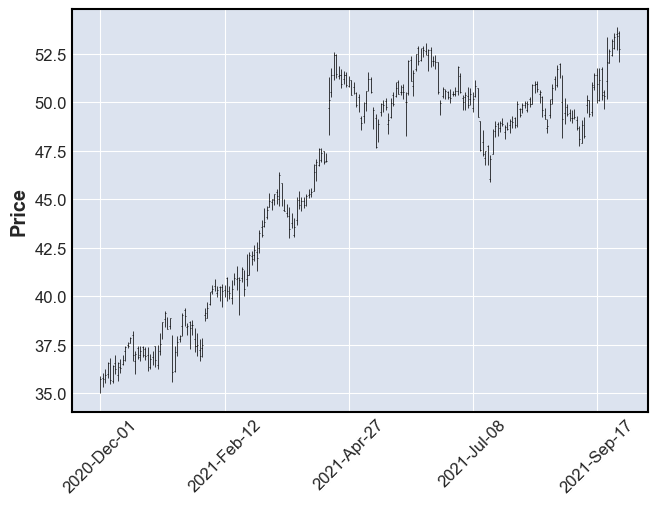

In [91]:
## candlestick charts with Mplfinance >>>
#
mpf.plot(df)


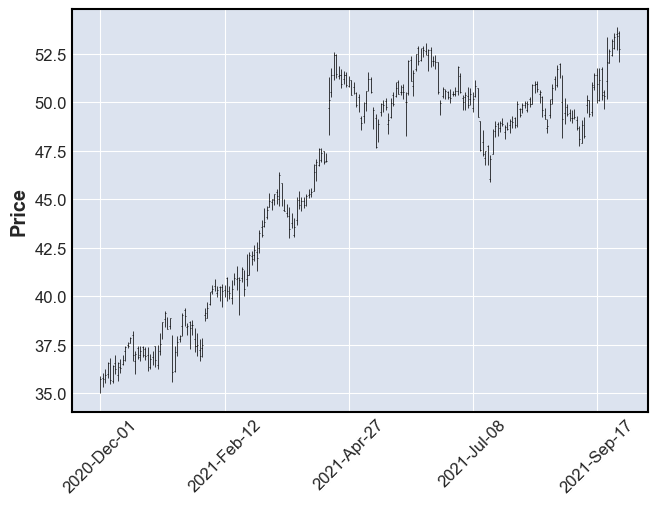

In [88]:
mpf.plot(df.loc['2020-05-01':,])

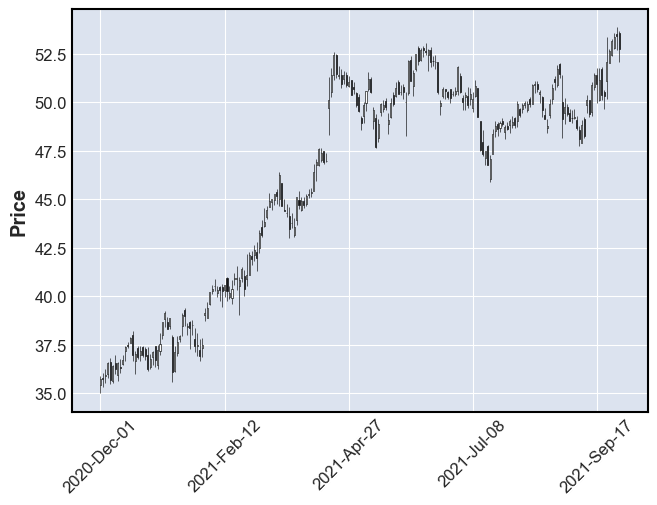

In [89]:
mpf.plot(df.loc['2020-05-01':,], type='candle')

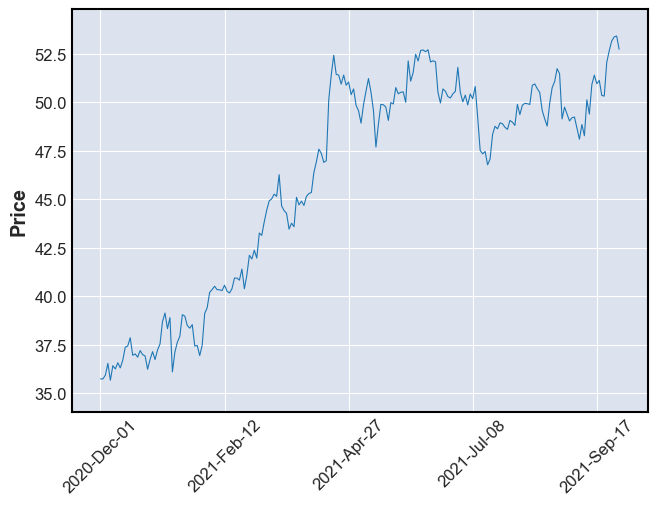

In [90]:
mpf.plot(df.loc['2020-05-01':,], type='line')

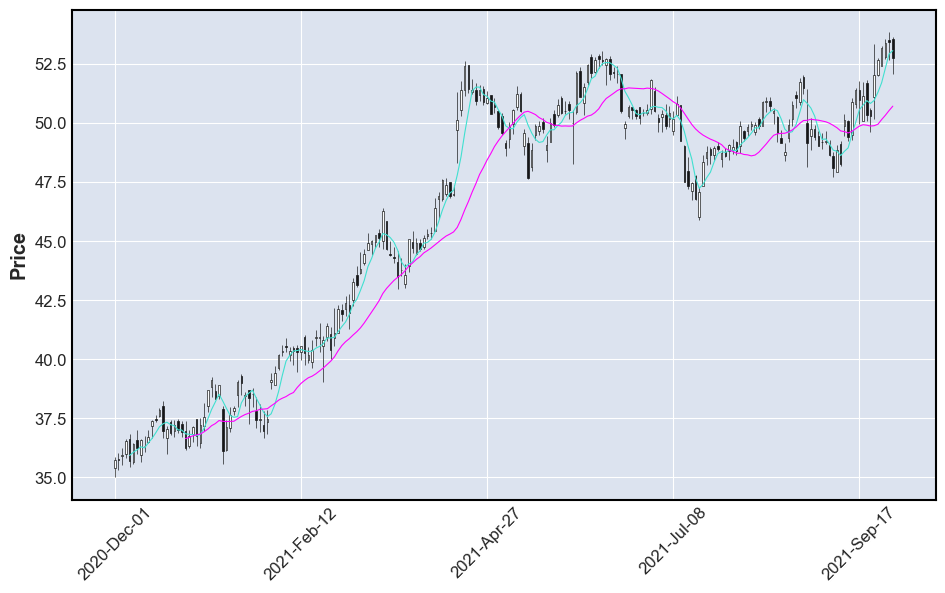

In [84]:
# moving average >>
mpf.plot(df.loc['2020-05-01':,],
         type='candle', mav=(5,20), figsize=(12,7))

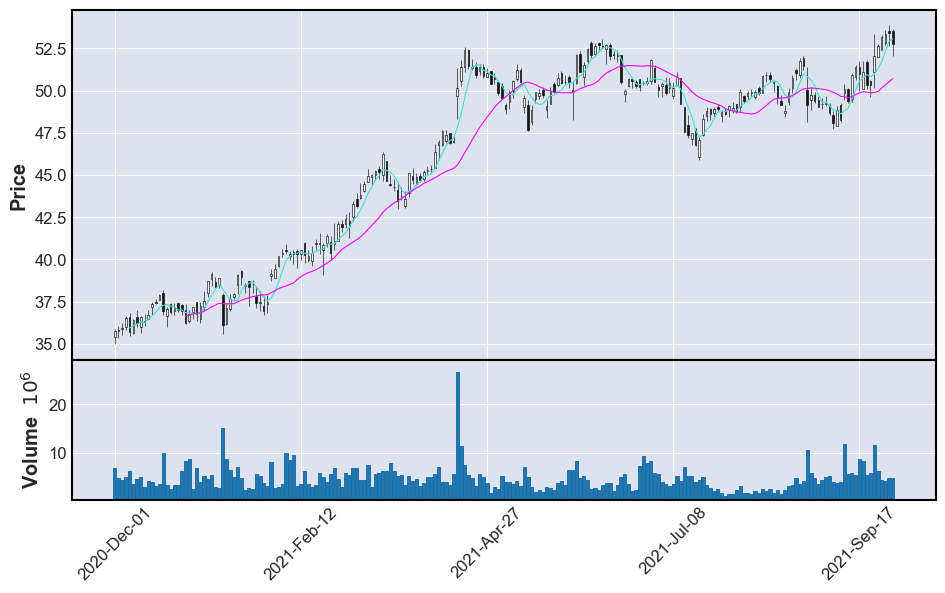

In [85]:
# display volume
mpf.plot(df.loc['2020-05-01':,], volume=True,
         type='candle', mav=(5,20), figsize=(12,7))

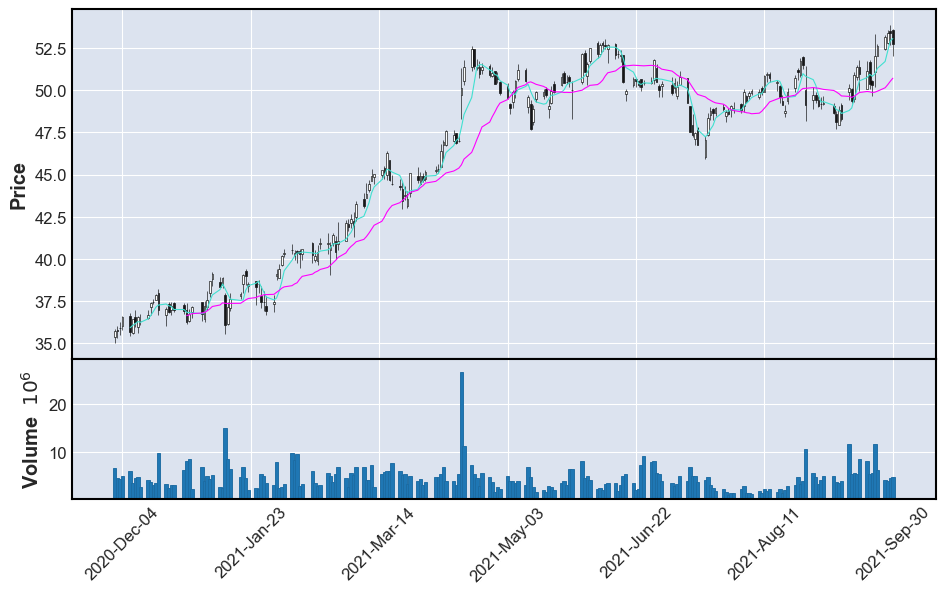

In [86]:
# with non-trading days
mpf.plot(df.loc['2020-05-01':,], volume=True,
         type='candle', mav=(5,20), figsize=(12,7),
         show_nontrading=True)

In [92]:
!pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29422 sha256=167e341f3a316f7a55e95f0f6c67f438978a5fbde1db3187eb870a55d0c75bb9
  Stored in directory: c:\users\mixas\appdata\local\pip\cache\wheels\a1\d7\29\7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [93]:
import webbrowser
import yahoo_fin.stock_info as si
import mplfinance as mpf
import matplotlib.pyplot as plt
import datetime
import ta
import warnings

In [94]:
# Technical Analysis Library
url="https://github.com/bukosabino/ta"
webbrowser.open(url)

True

In [95]:
# get most active stocks on the day
ma = si.get_day_most_active()
print('\n', ma.columns,
      '\n\n', ma[['Symbol', 'Name', 'Volume']][:40])


 Index(['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Volume',
       'Avg Vol (3 month)', 'Market Cap', 'PE Ratio (TTM)'],
      dtype='object') 

    Symbol                             Name      Volume
0     NIO                         NIO Inc.  28927000.0
1    NVAX                    Novavax, Inc.  12657000.0
2     GME                   GameStop Corp.  11733000.0
3    NVDA               NVIDIA Corporation  11518000.0
4     ERF             Enerplus Corporation   5466000.0
5    PLTR       Palantir Technologies Inc.   8347000.0
6    TSLA                      Tesla, Inc.   8095000.0
7    LYFT                       Lyft, Inc.   7726000.0
8     AMD     Advanced Micro Devices, Inc.   6742000.0
9    HOOD          Robinhood Markets, Inc.   6794000.0
10   MARA  Marathon Digital Holdings, Inc.   6564000.0


In [103]:
# get data >>>
tcr='DELL'
'''
start='2019-12-01'
end = '2020-09-01'
df=si.get_data(tcr, start_date=start, end_date=end, interval='1d')
'''
df=si.get_data(tcr, interval='1d')
print('\n', df.columns, '\n\n', df.index)


 Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object') 

 DatetimeIndex(['2016-08-17', '2016-08-18', '2016-08-19', '2016-08-22',
               '2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26',
               '2016-08-29', '2016-08-30',
               ...
               '2024-05-23', '2024-05-24', '2024-05-28', '2024-05-29',
               '2024-05-30', '2024-05-31', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-06-06'],
              dtype='datetime64[ns]', length=1964, freq=None)


C:\Users\mixas\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




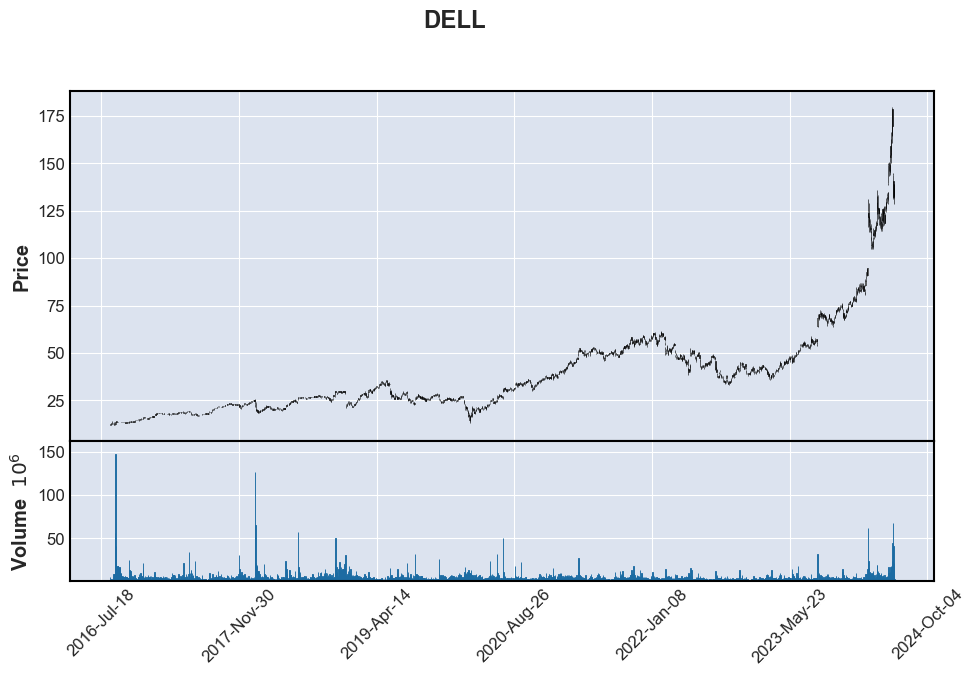

In [104]:
# wait results for some while >>>
mpf.plot(df, type='candle', volume=True,
         main_panel=0, volume_panel=1, figsize=(12,7),
         show_nontrading=True, title=tcr)

C:\Users\mixas\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




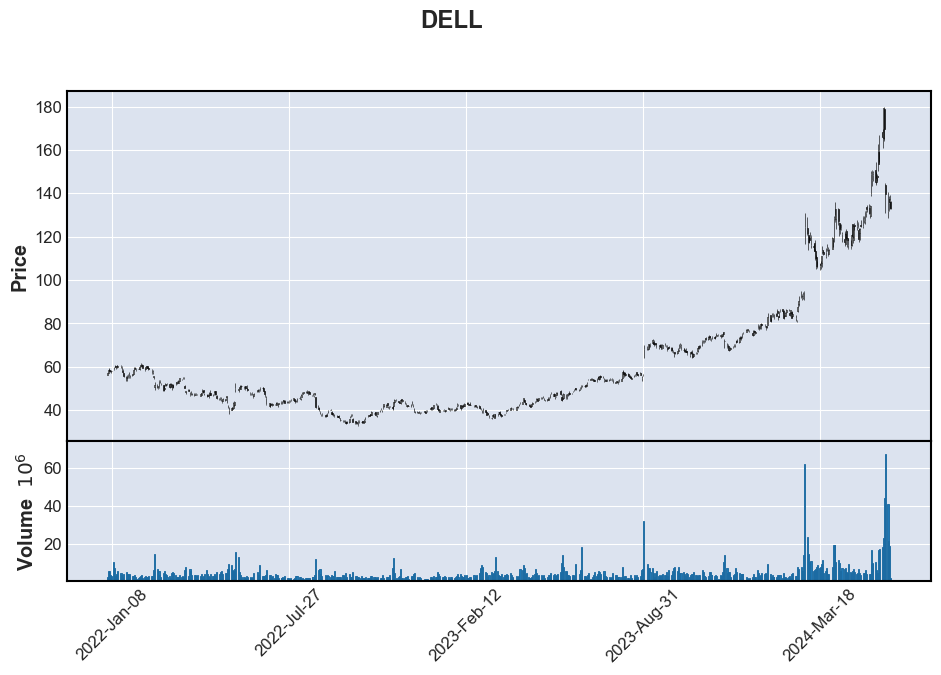

In [105]:
# two years period >>
start = str( datetime.date.today().year-2 )
dfs = df.loc[start:,]

mpf.plot(dfs, type='candle', volume=True,
         main_panel=0, volume_panel=1, figsize=(12,7),
         show_nontrading=True, title=tcr)

In [106]:
print('\n', dfs.isnull().sum())
'''
# drop NaN values if they are >>
dfs = dropna(dfs)  # <- this is from "ta.utils"
'''
print('\n', dfs.columns)


 open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

 Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object')


In [107]:
warnings.filterwarnings("ignore")

# add all ta features >>>
dfs = ta.add_all_ta_features(dfs, open="open", high="high",
                          low="low", close="close",
                          volume="volume")

warnings.filterwarnings("default")

print('\n', dfs.columns)


 Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_con

<Axes: title={'center': 'DELL'}, ylabel='Price in $'>

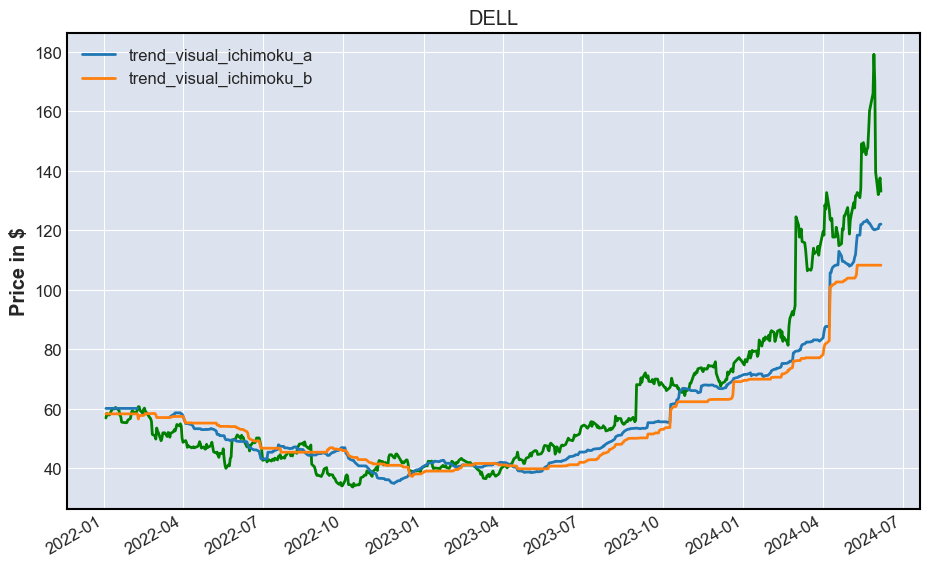

In [108]:
##
### Simple Moving Averages (SMA) >>>
##

# Initialize the plot figure
fig = plt.figure(figsize=(11,7))

# Add a subplot and label for y-axis
#  "111" means "1x1 grid, first subplot" >>
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
dfs.close.plot(ax=ax1, color='g', lw=2.)

# Plot the short and long moving averages
dfs[['trend_visual_ichimoku_a',
     'trend_visual_ichimoku_b']].plot(ax=ax1, lw=2., title=tcr)

C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\2910917329.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\2910917329.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



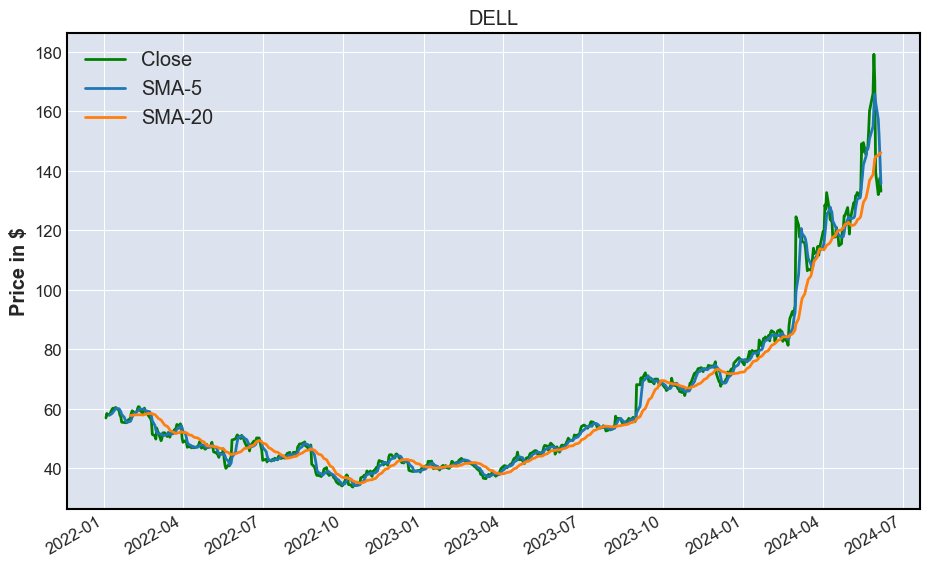

In [112]:
### Simple Moving Averages (SMA) >>>
##

dfs['short_mavg']=ta.trend.sma_indicator(dfs.close, window=5)
dfs['long_mavg'] =ta.trend.sma_indicator(dfs.close, window=20)

# plot >>>
fig = plt.figure(figsize=(11,7))
ax1 = fig.add_subplot(111,  ylabel='Price in $')
dfs.close.plot(ax=ax1, color='g', lw=2.)
dfs[['short_mavg',
     'long_mavg']].plot(ax=ax1, lw=2., title=tcr)
plt.legend(['Close', 'SMA-5', 'SMA-20'],
                           fontsize='large')

In [114]:
!pip install arch

  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/37/08/acd7fbc1e15b4701b5be3acd6fd575865a274885ea6bc72ec7af909cc7e5/arch-7.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   - ------------------------------------- 41.0/924.9 kB 991.0 kB/s eta 0:00:01
   ------ --------------------------------- 143.4/924.9 kB 2.1 MB/s eta 0:00:01
   ----------------- ---------------------- 399.4/924.9 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------  921.6/924.9 kB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 924.9/924.9 kB 5.3 MB/s eta 0:00:00


sys:1: ResourceWarning:

unclosed socket <zmq.Socket(zmq.PUSH) at 0x13d150dcfa0>

C:\Users\mixas\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning:

unclosed file <_io.BufferedWriter name=8>

C:\Users\mixas\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning:

unclosed file <_io.BufferedReader name=9>

C:\Users\mixas\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning:

unclosed file <_io.BufferedReader name=10>



In [115]:
import yahoo_fin.stock_info as si
import webbrowser
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import scipy.stats as stats
from arch import arch_model
from scipy.stats import norm

In [116]:
# get most active stocks on the day
ma = si.get_day_most_active()
print('\n', ma.columns,
      '\n\n', ma[['Symbol', 'Name', 'Volume']][:40])


 Index(['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Volume',
       'Avg Vol (3 month)', 'Market Cap', 'PE Ratio (TTM)'],
      dtype='object') 

    Symbol                             Name      Volume
0     NIO                         NIO Inc.  33712000.0
1    NVDA               NVIDIA Corporation  17685000.0
2     GME                   GameStop Corp.  16245000.0
3    NVAX                    Novavax, Inc.  15738000.0
4    PLTR       Palantir Technologies Inc.  11962000.0
5    TSLA                      Tesla, Inc.  11716000.0
6    LYFT                       Lyft, Inc.   9563000.0
7    MARA  Marathon Digital Holdings, Inc.   9200000.0
8     AMD     Advanced Micro Devices, Inc.   8850000.0
9     ERF             Enerplus Corporation   5466000.0
10   HOOD          Robinhood Markets, Inc.   9016000.0
11   GRAB            Grab Holdings Limited   6476000.0
12   PYPL            PayPal Holdings, Inc.   5690000.0
13   MNST     Monster Beverage Corporation   5602000.0
14   AAPL 

In [117]:
# get data >>>
tcr='NVDA'

# two years period >>
start = str( datetime.date.today().year-2 )


In [118]:
df=si.get_data(tcr, start_date=start)
print('\n', df.columns,'\n', df.index)


 Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], dtype='object') 
 DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2024-05-23', '2024-05-24', '2024-05-28', '2024-05-29',
               '2024-05-30', '2024-05-31', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-06-06'],
              dtype='datetime64[ns]', length=610, freq=None)


In [119]:
print('\nDuplicated index:', df.index.duplicated())
# remove observations with duplicated index >>
df = df[~df.index.duplicated()]


Duplicated index: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False F

In [120]:
# arithmetic return & Log returns
df['R'] = df['adjclose'].pct_change() # <- is not percentage !!!
df['r'] = np.log1p(df.R)

C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\4159136859.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\4159136859.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'NVDA')

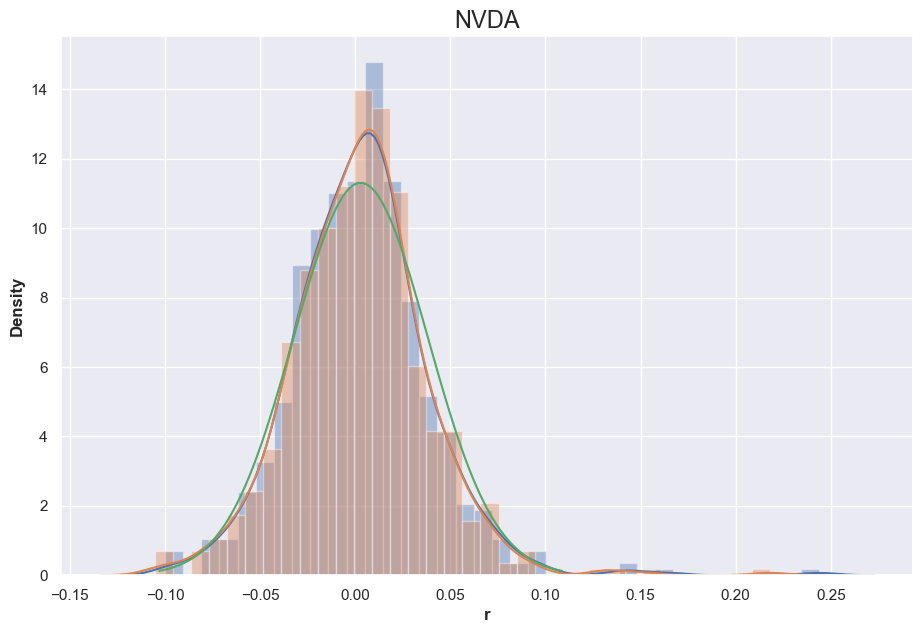

In [121]:
mu = df.R.mean()
variance = df.R.var()
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

sns.set(rc={'figure.figsize':(11,7)})
sns.distplot(df.R)
sns.distplot(df.r)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title(label=tcr, fontsize=17)

Text(0.5, 1.0, 'NVDA')

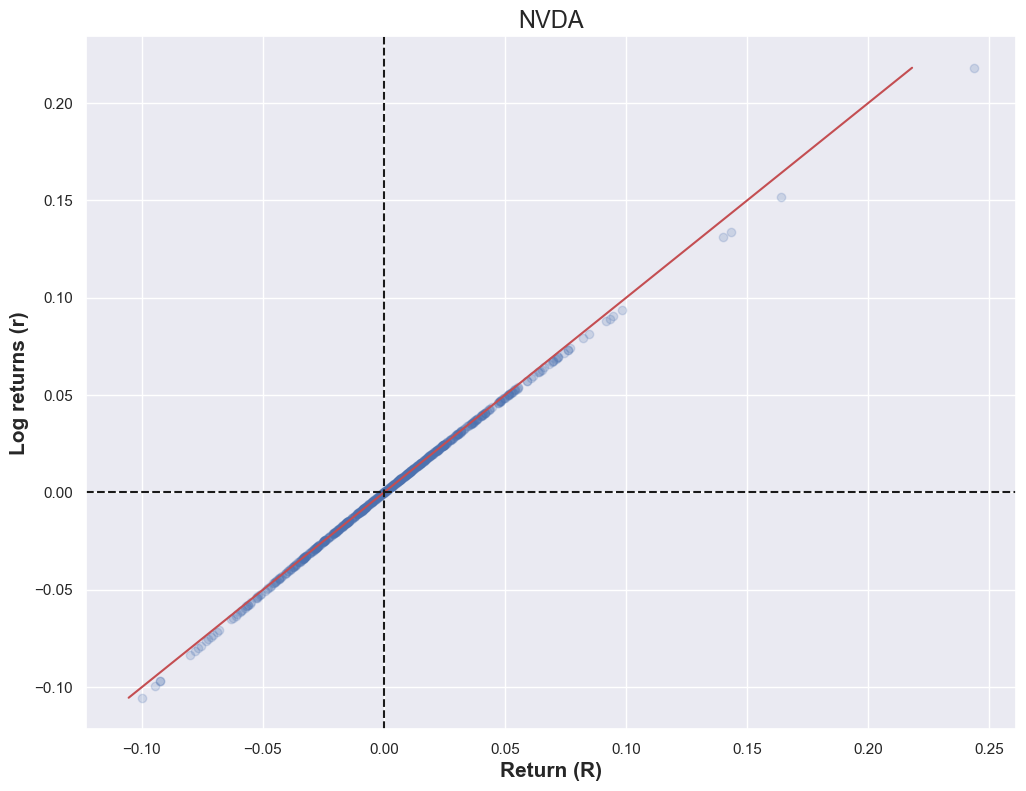

In [122]:
x = np.linspace(df.r.min(),df.r.max(),5)
y = x

plt.figure(figsize=(12,9))
plt.scatter(x=df.R, y=df.r, alpha=0.2)
plt.plot(x,y, 'r')
plt.xlabel('Return (R)', fontsize=15)
plt.ylabel('Log returns (r)', fontsize=15)
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.title(label=tcr, fontsize=17)

C:\Users\mixas\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




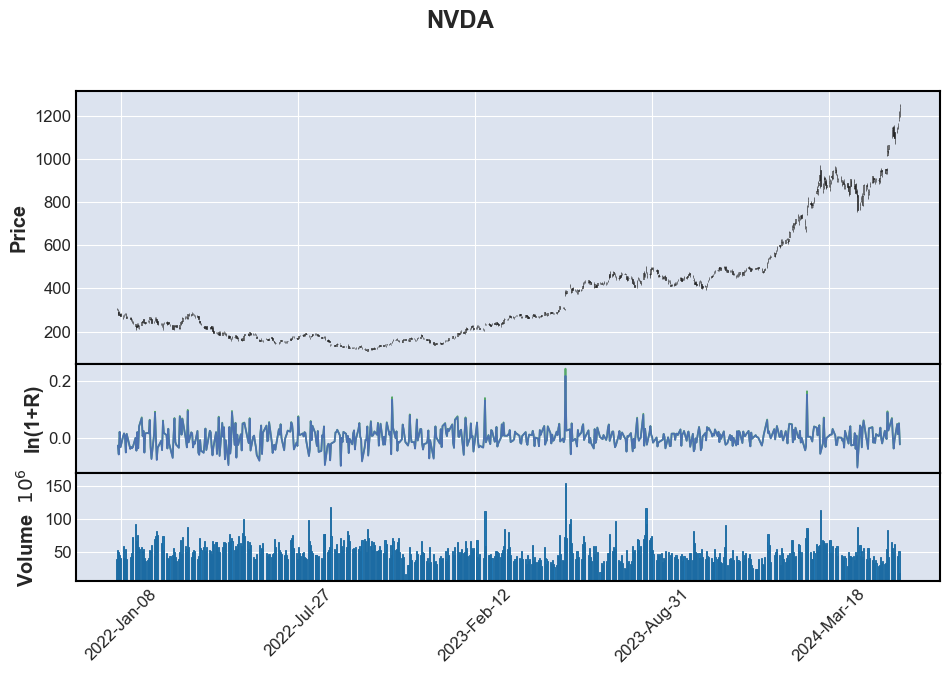

In [123]:
end = datetime.date.today()
ap2 = [ mpf.make_addplot(df.R.loc[:end,]
                         ,color='g', panel=1, ylabel='R'),
        mpf.make_addplot(df.r.loc[:end,]
                         ,color='b', panel=1, ylabel='ln(1+R)'),
      ]

mpf.plot(df.loc[:end,],
         type='candle', volume=True,
         main_panel=0, volume_panel=2, addplot=ap2, figsize=(12,7),
         show_nontrading=True, title=tcr)

C:\Users\mixas\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




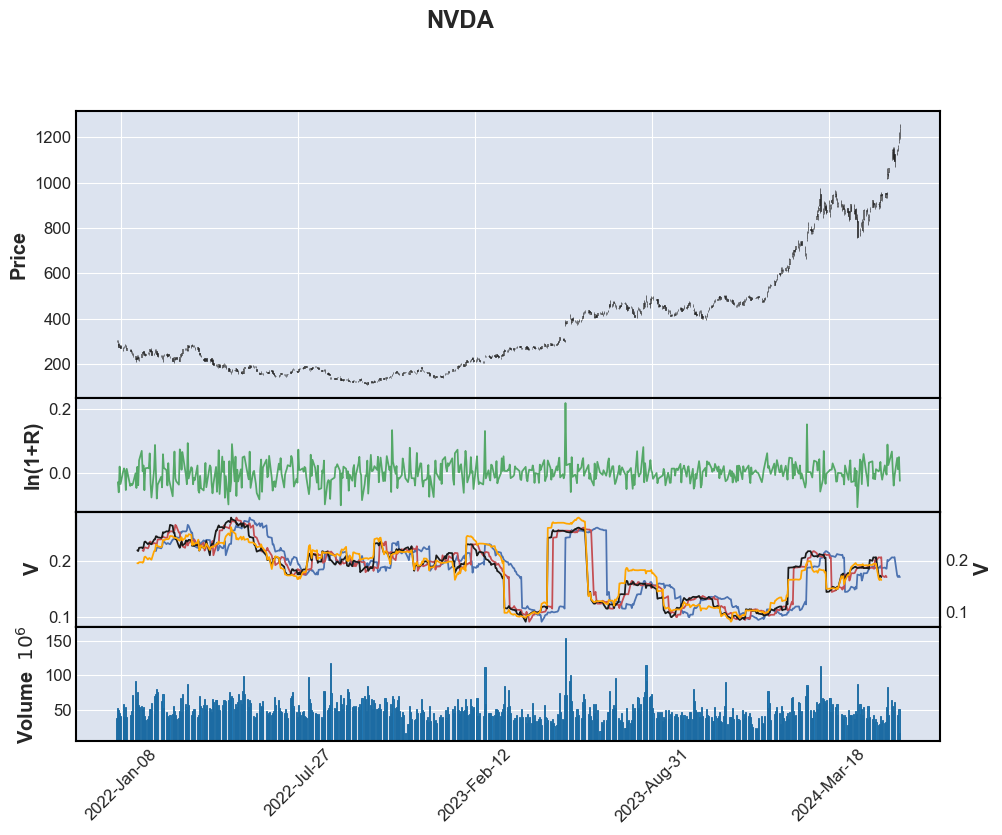

In [124]:
#
## Volatility by rolling window
#
w = 30
w2 = int(-w/3)

# usual way (from forums...) >>>
df['V'] = df.r.rolling(window=w).std() * np.sqrt(w)
'''
df['V'] = df.r.rolling(window=w).var()
'''
# my idea to remove leads >>>
df['V2'] = df.V.shift(w2)
# better >>>
df['Vc'] = df.r.rolling(window=w, center=True).std() * np.sqrt(w)
# Provide a window type >>>
df['Vw'] = df.r.rolling(window=w, center=True,
                        win_type='triang').std() * np.sqrt(w)
'''
end = '2020-12-01'
'''
end = df.index.max()
ap2 = [ mpf.make_addplot(df.r.loc[:end,]
                         ,color='g', panel=1, ylabel='ln(1+R)'),
        mpf.make_addplot(df.V.loc[:end,]
                         ,color='b', panel=2, ylabel='V'),
        mpf.make_addplot(df.V2.loc[:end,]
                         ,color='r', panel=2, ylabel='V'),
        mpf.make_addplot(df.Vc.loc[:end,]
                         ,color='k', panel=2, ylabel='V'),
        mpf.make_addplot(df.Vw.loc[:end,]
                         ,color='orange', panel=2, ylabel='V'),
      ]

mpf.plot(df.loc[:end,],
         type='candle', volume=True,
         main_panel=0, volume_panel=3, addplot=ap2, figsize=(12,9),
         show_nontrading=True, title=tcr)


>>> Simple historical VaR is -0.054 



C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\4147182897.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'NVDA')

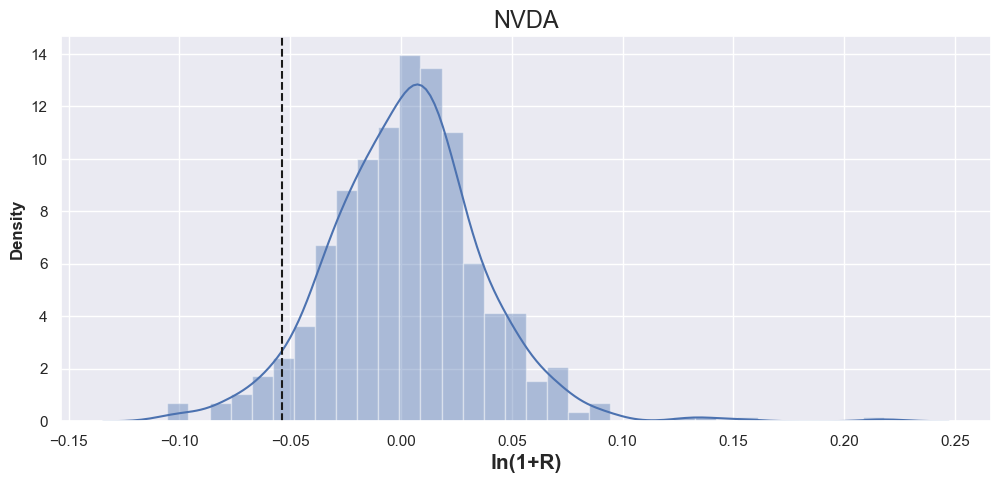

In [125]:
#
## assumption of constant daily variance
#
p = 5  # <- p% percentile

dff = df.r[~pd.isnull(df.r)]
#dff = dff[~dff.index.duplicated()]
historic_var = np.percentile(dff, p, method='lower')
print('\n>>> Simple historical VaR is',
      np.round(historic_var,3), '\n')

sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df.r)
plt.axvline(historic_var, color="k", linestyle="--")
plt.xlabel('ln(1+R)', fontsize=15)
plt.title(label=tcr, fontsize=17)

In [126]:
## Bootstraped p% VaR
#
# defining the required functions ->

# historical VaR at (100-p)% confidence >>
def VaR(data, p):
 return np.percentile(data, p, method='lower')

# random samples with replacement >>
def bootstrap(data, func, p):
    sample = np.random.choice(data, len(data), replace=True)
    return func(sample, p)

# Draw bootstrap replicates >>
def draw_bs_reps(data, func, p, size):
    # Initialize array of replicates >>
    bs_replicates = np.empty(size)
    # Generate replicates >>
    for i in range(size):
        bs_replicates[i] = bootstrap(data, func, p)
    return bs_replicates


>>> Bootstraped VaR is -0.053


C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\2333892507.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'VaR, NVDA')

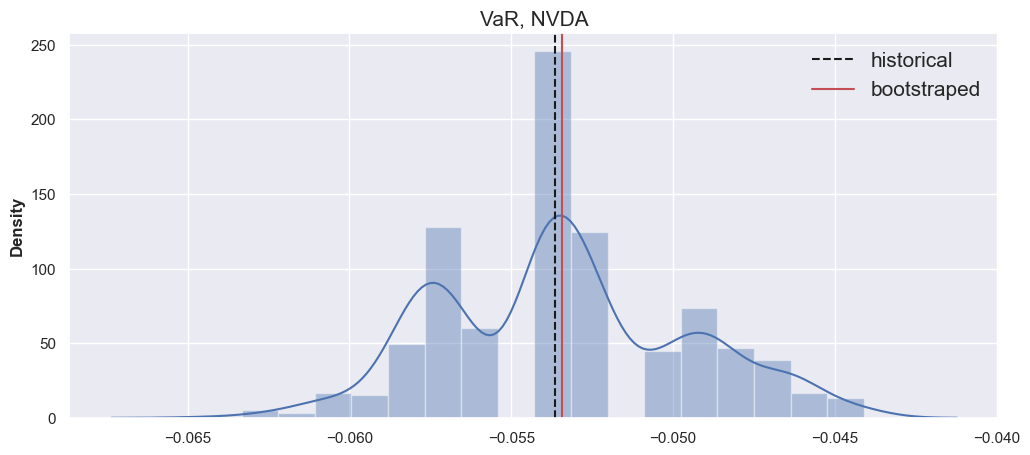

In [127]:
B = 1000

bootstrap_VaR = draw_bs_reps(dff, VaR, p, B)

print('\n>>> Bootstraped VaR is',
      np.round(np.mean(bootstrap_VaR),3))
#%%
# historical & bootstraped VaR >>
sns.distplot(bootstrap_VaR)
plt.axvline(historic_var, color="k", linestyle="--",
            label='historical')
plt.axvline(np.mean(bootstrap_VaR), color="r",
            label='bootstraped')
plt.legend(loc='best', fontsize=15)
plt.title('VaR, '+tcr, fontsize=15)


 Bootstraped VaR Confidence Interval is [-0.061 -0.046]


C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\204210390.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'VaR, NVDA')

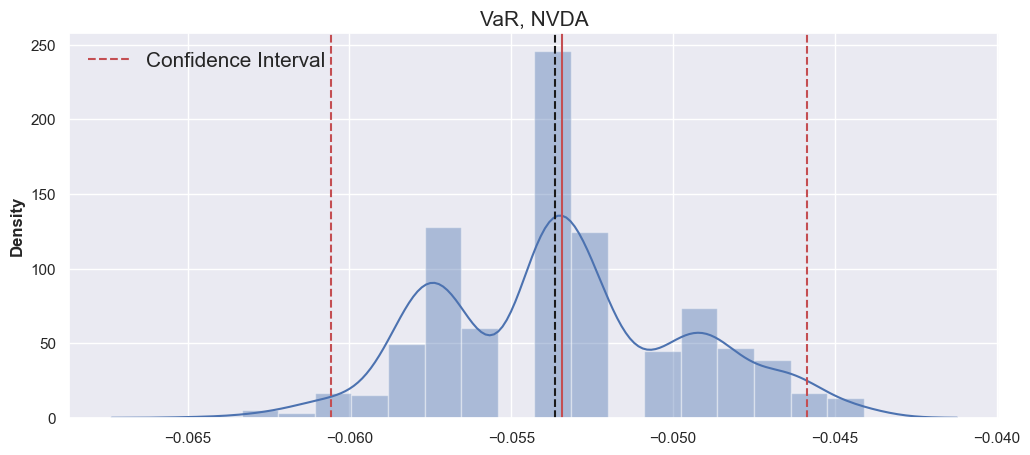

In [128]:
# Confidence Interval
L = p/2
U = 100-L

conf_interval = np.percentile(bootstrap_VaR, [L, U])

print('\n Bootstraped VaR Confidence Interval is',
      np.round(conf_interval,3))

sns.distplot(bootstrap_VaR)
plt.axvline(historic_var, color="k", linestyle="--")
plt.axvline(np.mean(bootstrap_VaR), color="r")
plt.axvline(conf_interval[0], color="r", linestyle="--")
plt.axvline(conf_interval[1], color="r", linestyle="--",
            label='Confidence Interval')
plt.legend(loc='upper left', fontsize=15)
plt.title('VaR, '+tcr, fontsize=15)

In [129]:
## GARCH(1,1)
#

# normal error distribution
res = arch_model(dff, rescale=True).fit()

# Students's t error distribution
rest = arch_model(dff, rescale=True, dist='t').fit()

# "nu" is degree of freedom estimate in GARCH-t >>
print('\n', res.summary(),'\n', rest.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2740889856.210724
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2254542093.7534294
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1078.8470119601218
Iteration:      4,   Func. Count:     32,   Neg. LLF: 216.14269806180283
Iteration:      5,   Func. Count:     37,   Neg. LLF: 223.0515928845091
Iteration:      6,   Func. Count:     45,   Neg. LLF: 227.52375793894618
Iteration:      7,   Func. Count:     52,   Neg. LLF: 214.22716087120548
Iteration:      8,   Func. Count:     57,   Neg. LLF: 214.71508877944413
Iteration:      9,   Func. Count:     63,   Neg. LLF: 212.91230560885998
Iteration:     10,   Func. Count:     68,   Neg. LLF: 212.71463139600263
Iteration:     11,   Func. Count:     73,   Neg. LLF: 212.70000281502536
Iteration:     12,   Func. Count:     78,   Neg. LLF: 212.69845687467676
Iteration:     13,   Func. Count:     83,   Neg. LLF: 212.69845618902895
Optimization terminated successfully    (Exit mode 0)


 Scale = 10.0


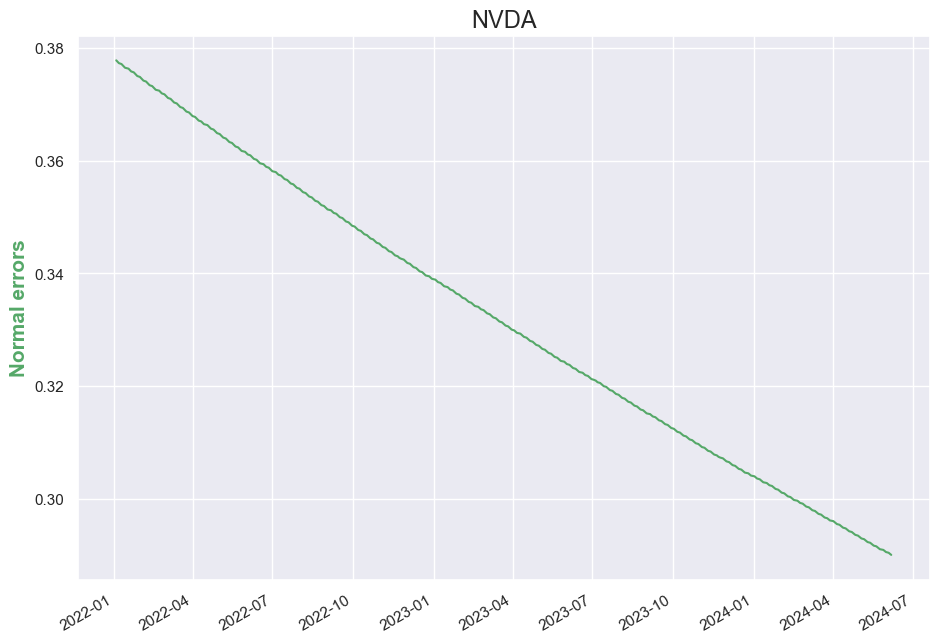

In [130]:
## returns exhibit time-varying volatility
#
plt.figure(figsize=(11,8))
res.conditional_volatility.plot(color='g')
plt.ylabel('Normal errors', fontsize=15, color='g')
plt.title(label=tcr, fontsize=17)

print('\n Scale =', rest.scale)

In [132]:
df['cv']=np.sqrt(rest.conditional_volatility/rest.scale)


C:\Users\mixas\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




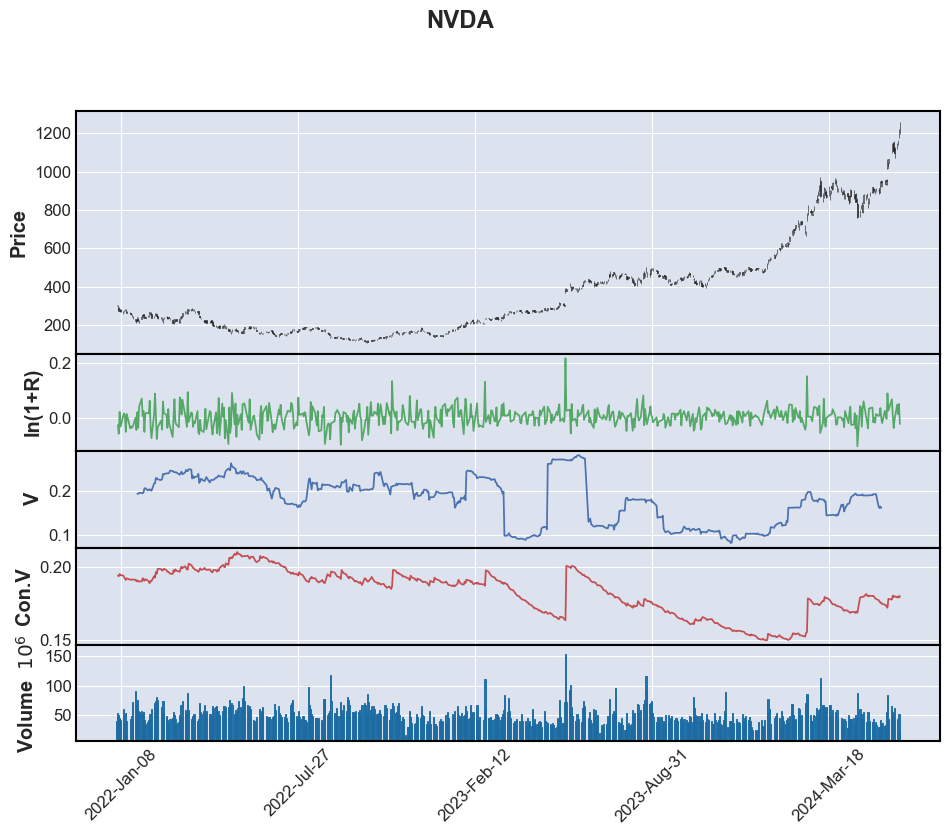

In [133]:
ap2 = [ mpf.make_addplot(df.r.loc[:end,]
                         ,color='g', panel=1, ylabel='ln(1+R)'),
        mpf.make_addplot(df.Vw.loc[:end,]
                         ,color='b', panel=2, ylabel='V'),
        mpf.make_addplot(df.cv.loc[:end,]
                         ,color='r', panel=3, ylabel='Con.V'),
      ]

mpf.plot(df.loc[:end,],
         type='candle', volume=True,
         main_panel=0, volume_panel=4, addplot=ap2, figsize=(12,9),
         show_nontrading=True, title=tcr)


 Garch VaR mean value is -0.053


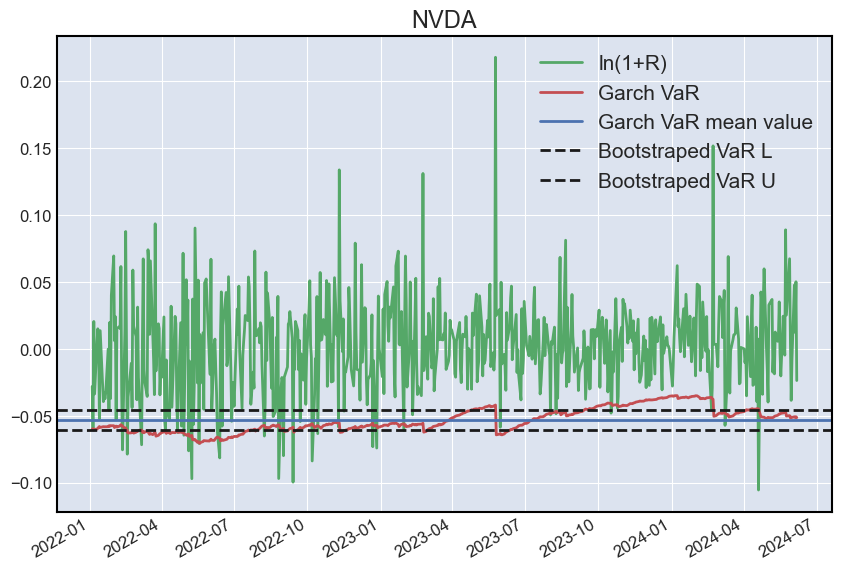

In [134]:
# conditional squared time-varying volatility >>
df['v']=(rest.conditional_volatility/rest.scale)**2

# Garch VaR >>
mu = df.r.mean()
var = mu + np.sqrt(df.v) * norm.ppf(p/100)

plt.figure(figsize=(10,7))
df.r.plot(color='g', label='ln(1+R)')
var.plot(color='r', label='Garch VaR')
plt.axhline(var.mean(), color="b", label='Garch VaR mean value')
plt.axhline(conf_interval[0], color="k",
            label='Bootstraped VaR L', linestyle="--")
plt.axhline(conf_interval[1], color="k",
            label='Bootstraped VaR U', linestyle="--")
plt.legend(loc='best', fontsize=15)
plt.title(label=tcr, fontsize=17)

print('\n Garch VaR mean value is', np.round(var.mean(),3))

C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\2641833191.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\mixas\AppData\Local\Temp\ipykernel_8816\2641833191.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751





 VaR from normal distribution = -0.055 
 Historical VaR = -0.054 
 Bootstraped VaR = -0.053 
 Garch VaR mean value is -0.053


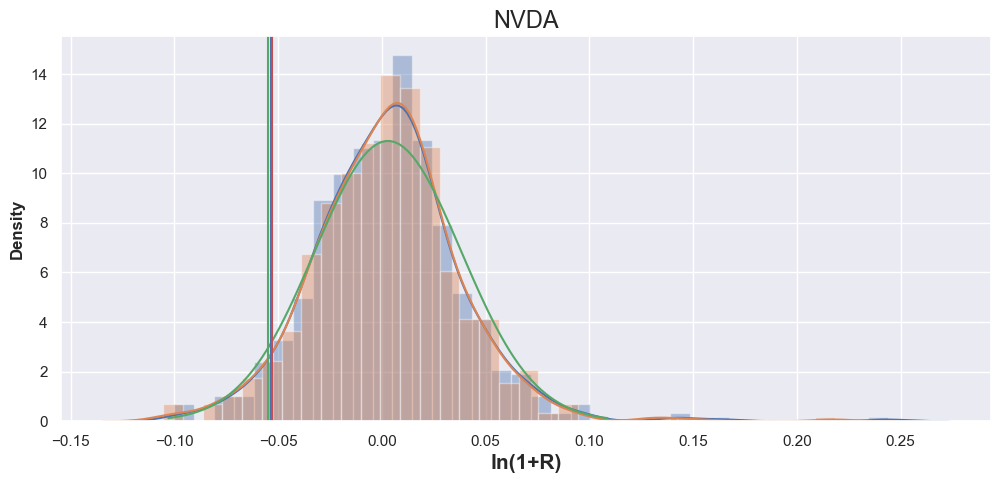

In [135]:
# mean values are close to each other
mu = df.R.mean()
variance = df.R.var()
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
varn = mu + norm.ppf(p/100)*sigma

sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(df.R)
sns.distplot(df.r)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.axvline(varn, color="g")
plt.axvline(np.mean(bootstrap_VaR), color="b")
plt.axvline(var.mean(), color="r")
plt.xlabel('ln(1+R)', fontsize=15)
plt.title(label=tcr, fontsize=17)

print('\n VaR from normal distribution =',
      np.round(varn, 3),
      '\n Historical VaR =',
      np.round(historic_var,3),
      '\n Bootstraped VaR =',
      np.round(np.mean(bootstrap_VaR),3),
      '\n Garch VaR mean value is', np.round(var.mean(),3))